In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Описание столбцов:

Country - Name of the country.
happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10
gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score.
family - The extent to which Family contributes to the calculation of the Happiness Score
health - The extent to which Life expectancy contributed to the calculation of the Happiness Score
freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
generosity - A numerical value calculated based on poll participants’ perceptions of generosity in their country.
government_trust - The extent to which Perception of Corruption contributes to Happiness Score.
dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country.
continent - Region of the country.

Задание 1

Базово изучите датасет (достаточно методов info() и describe()).
Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

In [ ]:
df = pd.read_csv('happines_corruption.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [ ]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


<Axes: xlabel='gdp_per_capita', ylabel='cpi_score'>

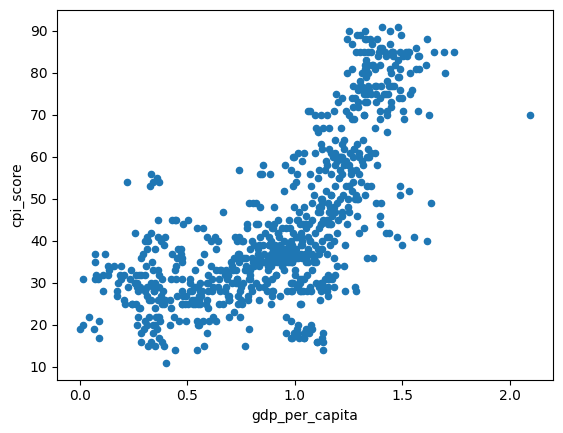

In [ ]:
#Верно ли, что чем выше ВВП, тем выше и уровень счастья?
df.plot(kind='scatter', x='gdp_per_capita', y='cpi_score')

Вывод: Да, верно (на графике видим положительную линейную (или может даже экспоненциальную зависимость)

<Axes: xlabel='government_trust', ylabel='cpi_score'>

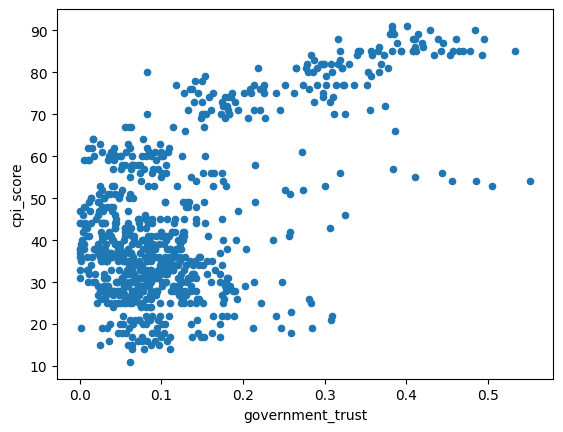

In [ ]:
#Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья??
df.plot(kind='scatter', x='government_trust', y='cpi_score')

Вывод: Нет, неверно (на графике видим отсутствие линейной зависимости)

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,0.023495,0.192633,0.693001
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,-0.035782,0.111701,0.704483
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,-0.588630,-0.869885,0.132031
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,0.070172,0.347438,0.644478
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,0.058195,0.208709,0.482923
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-0.109797,-0.215131,0.165972
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,0.021781,-0.008136,0.620089
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,0.057519,-0.654570,0.032630
Year,0.023495,-0.035782,-0.588630,0.070172,0.058195,-0.109797,0.021781,0.057519,1.000000,0.448616,-0.001460
social_support,0.192633,0.111701,-0.869885,0.347438,0.208709,-0.215131,-0.008136,-0.654570,0.448616,1.000000,0.109077


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-9-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,0.023495,0.192633,0.693001
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,-0.035782,0.111701,0.704483
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,-0.588630,-0.869885,0.132031
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,0.070172,0.347438,0.644478
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,0.058195,0.208709,0.482923
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-0.109797,-0.215131,0.165972
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,0.021781,-0.008136,0.620089
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,0.057519,-0.654570,0.032630
Year,0.023495,-0.035782,-0.588630,0.070172,0.058195,-0.109797,0.021781,0.057519,1.000000,0.448616,-0.001460
social_support,0.192633,0.111701,-0.869885,0.347438,0.208709,-0.215131,-0.008136,-0.654570,0.448616,1.000000,0.109077


Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Оставьте только два столбца:'Temperature' и 'Sum'.
Постройте диаграмму рассеяния.
Постройте модель линейной регрессии для выбранных признаков.
Рассчитайте точность модели на тестовой выборке.
Выведите график остатков.

In [ ]:
df = pd.read_csv('gas_sales_data.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              252 non-null    int64  
 1   Month             252 non-null    int64  
 2   Temperature       252 non-null    float64
 3   Gangwondo         252 non-null    int64  
 4   Seoul             252 non-null    int64  
 5   Gyeonggido        252 non-null    int64  
 6   Incheon           252 non-null    int64  
 7   Gyeongsangnamdo   252 non-null    int64  
 8   Gyeongsangbukdo   252 non-null    int64  
 9   Gwangju           252 non-null    int64  
 10  Daegu             252 non-null    int64  
 11  Daejeon           252 non-null    int64  
 12  Busan             252 non-null    int64  
 13  Sejong            252 non-null    int64  
 14  Ulsan             252 non-null    int64  
 15  Jeollanamdo       252 non-null    int64  
 16  Jeollabukdo       252 non-null    int64  
 1

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,2010.000000,6.500000,13.367381,21187.654762,381844.194444,364211.321429,116839.166667,69503.865079,91440.480159,42210.015873,...,49795.369048,96483.678571,2723.710317,139338.325397,36998.813492,52306.031746,813.273810,84594.964286,44715.392857,1.666574e+06
std,6.067351,3.458922,9.540984,13849.668618,229323.680039,187675.176062,50204.769577,32343.651403,38831.743548,21646.078300,...,28359.574096,42725.971341,3765.498664,73185.024161,19424.570354,27625.166518,862.904837,47284.620633,25855.175390,7.965762e+05
min,2000.000000,1.000000,-5.740000,2800.000000,108894.000000,91000.000000,32372.000000,16218.000000,25449.000000,9781.000000,...,10624.000000,32947.000000,0.000000,36183.000000,9425.000000,9939.000000,0.000000,11354.000000,8574.000000,4.513220e+05
25%,2005.000000,3.750000,4.657500,11510.000000,173070.000000,223853.250000,73866.000000,45920.000000,59444.000000,26853.250000,...,27491.000000,65521.000000,0.000000,77515.750000,22325.000000,31468.250000,42.500000,47004.750000,24145.750000,1.094284e+06
50%,2010.000000,6.500000,14.315000,17421.000000,305387.000000,310090.000000,104425.500000,62439.000000,87222.500000,35050.000000,...,39853.000000,82972.000000,0.000000,121286.000000,33244.500000,47774.000000,612.500000,81050.500000,41661.000000,1.436072e+06
75%,2015.000000,9.250000,22.260000,27480.250000,595902.250000,500968.000000,161016.250000,90403.750000,113427.750000,57097.750000,...,70956.000000,121199.000000,5519.500000,198185.000000,48067.500000,67823.250000,1208.500000,111837.750000,58396.750000,2.226306e+06
max,2020.000000,12.000000,28.560000,64248.000000,928709.000000,859780.000000,241088.000000,157687.000000,192264.000000,99162.000000,...,123727.000000,215573.000000,12855.000000,352116.000000,97863.000000,125735.000000,4220.000000,198939.000000,119471.000000,3.748910e+06


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Temperature']]
y = df['Sum']

<Axes: xlabel='Temperature', ylabel='Sum'>

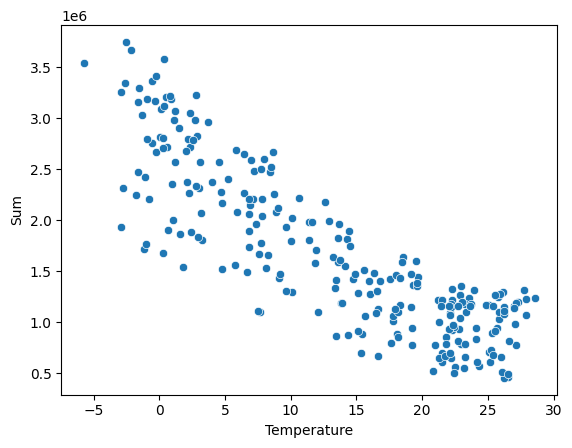

In [ ]:
sns.scatterplot(x="Temperature",
                    y="Sum",
                    data=df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(176, 1)

In [ ]:
y_train.shape

(176,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-69183.68395953])

In [ ]:
model.intercept_

2571665.5705572804

# y = -69184 * x - 2571666

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1441204.17465859,  736914.27195059, 1659132.7791311 ,
       1246106.18589271,  805406.11907052, 1632842.97922648,
        641440.78808644,  691944.87737689, 1508312.34809933,
        832387.75581473, 2683051.30173212, 1971151.19378857,
       1969075.68326979, 1834167.49954871, 1041322.48137251,
       1211514.34391295, 1213589.85443174, 1615547.0582366 ,
       1100820.4495777 , 2499714.53923937, 2099141.0091137 ,
        736222.43511099, 1431518.45890425, 1358875.59074675,
       1643912.36866   , 1983604.25690129,  816475.50850404,
       1625232.77399093, 2042410.38826689,  765279.58237399,
       1041322.48137251, 2609024.75989543,  956918.38694189,
       1934483.84129002, 1425291.92734789, 2344743.08717003,
       2294930.83471917,  769430.60341156, 2487953.31296625,
       2073543.04604868,  817167.34534364, 2968779.91648497,
       2721102.32790986, 2551602.30220902, 1580263.37941724,
       1906810.36770621, 1243338.83853433,  824777.55057919,
       1785738.92077704,

In [ ]:
y_test

165    1480101
6       464203
111    1634442
172    1474082
115     907624
        ...   
119    2703917
75     1583588
113     949311
118    1776507
120    3256385
Name: Sum, Length: 76, dtype: int64

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.769403571876491

Хорошая модель, высокий коэффициент детерминации

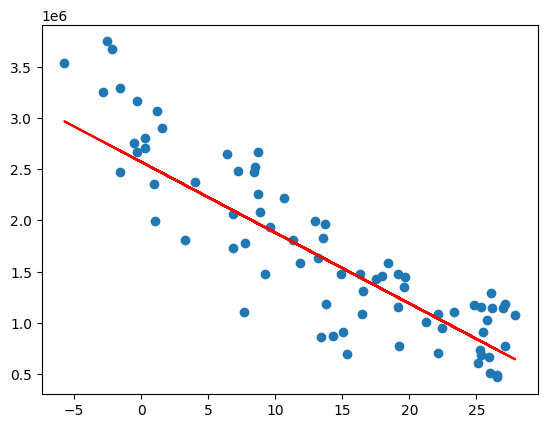

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')